In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Reading input

In [162]:
raw_input = pd.read_csv('data/prem_concat.csv', keep_default_na=True)

## Process inputs to create views

In [165]:
def get_season(inp_date):
    year = inp_date.year
    month = inp_date.month
    if( month < 5):
        return year-1
    else:
        return year
    
# adds the match day number as well as points for a team
def process_match_result(data_row, scores_map):
    if( data_row['FTR']=='D'):
        scores_map[data_row['HomeTeam']] = scores_map.get(data_row['HomeTeam'], list()) + [(data_row['Date'],1)]
        scores_map[data_row['AwayTeam']] = scores_map.get(data_row['AwayTeam'], list()) + [(data_row['Date'],1)]
    elif( data_row['FTR'] == 'A'):
        scores_map[data_row['HomeTeam']] = scores_map.get(data_row['HomeTeam'], list()) + [(data_row['Date'],0)]
        scores_map[data_row['AwayTeam']] = scores_map.get(data_row['AwayTeam'], list()) + [(data_row['Date'],3)]
    elif( data_row['FTR'] == 'H'):
        scores_map[data_row['HomeTeam']] = scores_map.get(data_row['HomeTeam'], list()) + [(data_row['Date'],3)]
        scores_map[data_row['AwayTeam']] = scores_map.get(data_row['AwayTeam'], list()) + [(data_row['Date'],0)]
    
    return scores_map
    
def get_points_table_matchday(inp_data, season_year):
    scores_map = dict()
    
    filtered_match_data = inp_data[ inp_data['SeasonDate'].isin( [season_year] ) ]
    
    for (idx, row) in filtered_match_data.iterrows():
        scores_map = process_match_result(row, scores_map)
        
    # process the (date, points earned) into (matchday, cumumlative points earned)
    points_table = dict()
    for (team, points_list) in scores_map.items():
        points_list.sort(key=lambda x: x[0])
        points_table[team] = np.cumsum([x[1] for x in points_list]).tolist()
    
    return points_table

def get_points_table_seasonend(inp_data, season_year):
    full_table = get_points_table_matchday(inp_data, season_year)
    
    final_points = dict()
    for(team, points_list) in full_table.items():
        final_points[team] = points_list[-1]
        
    return final_points
    

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


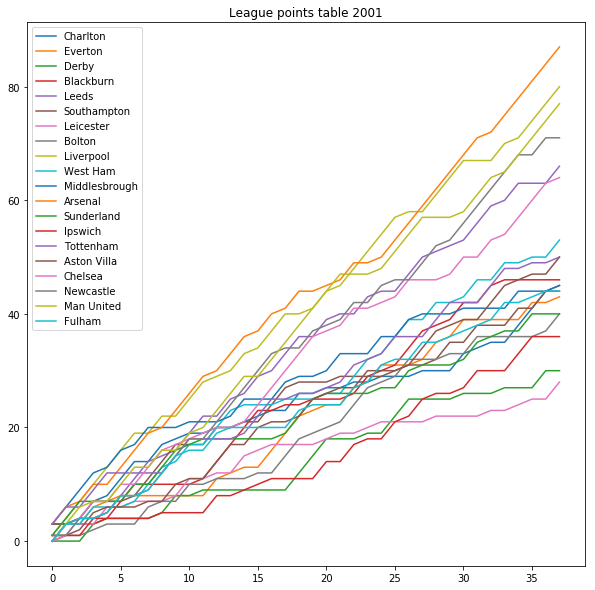

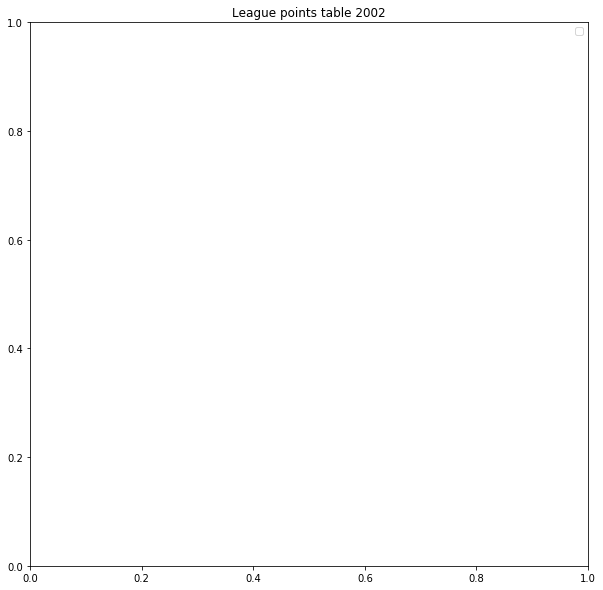

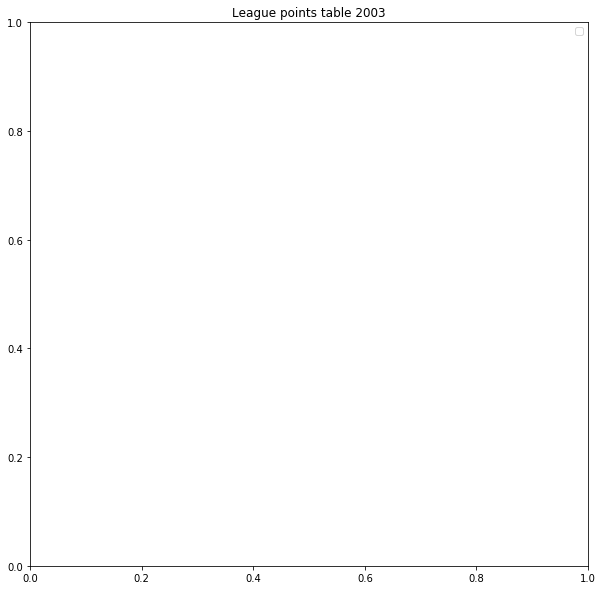

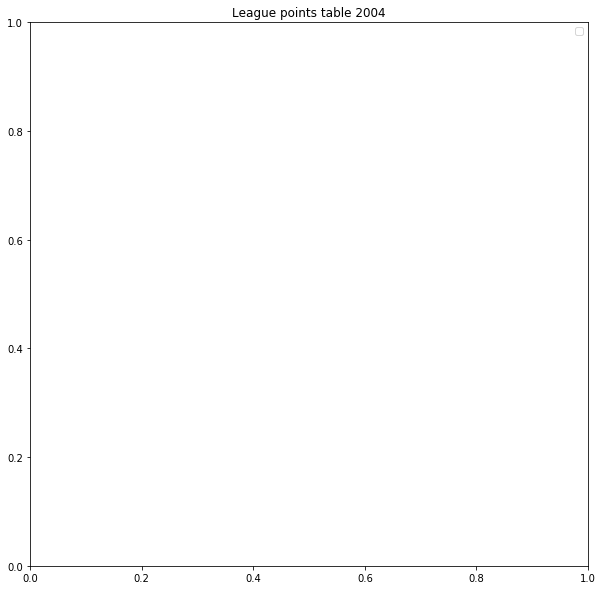

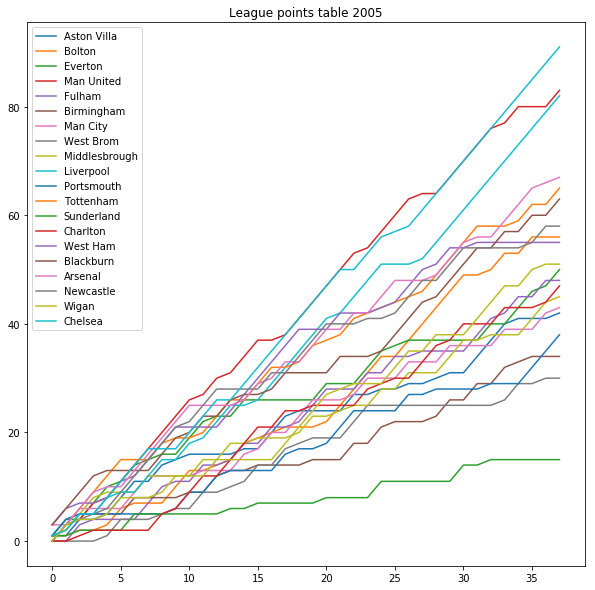

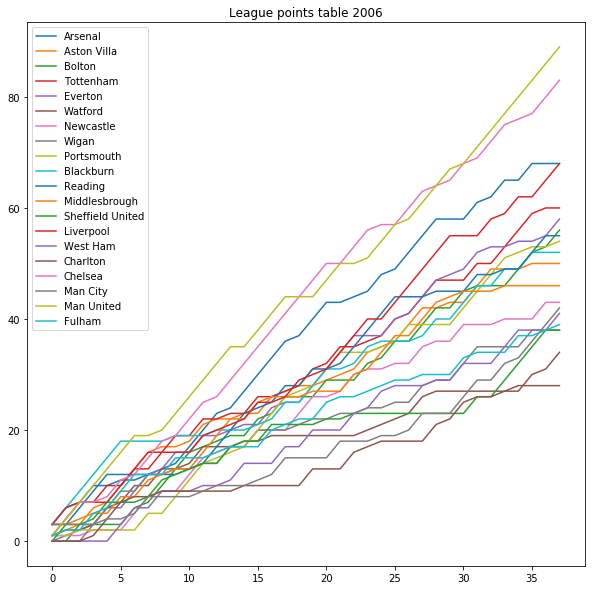

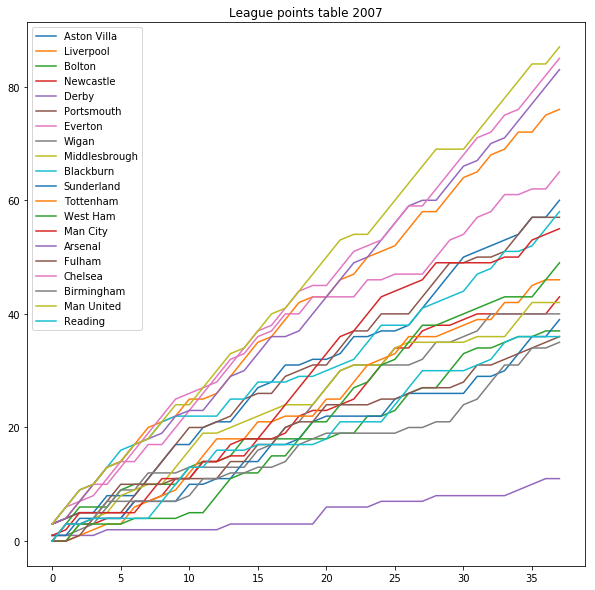

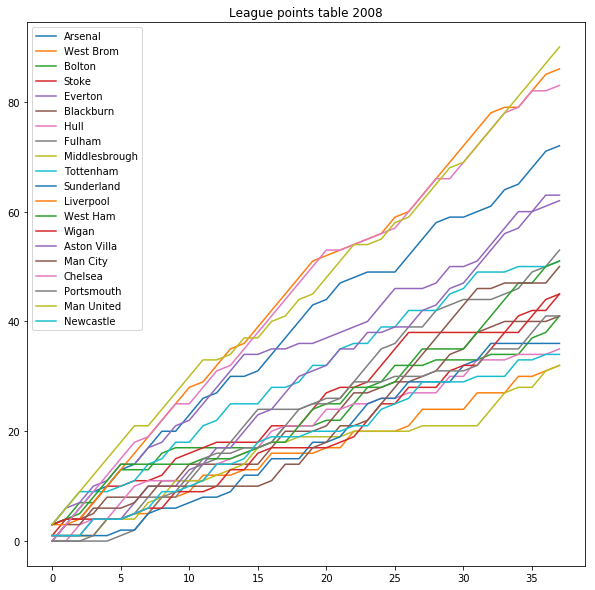

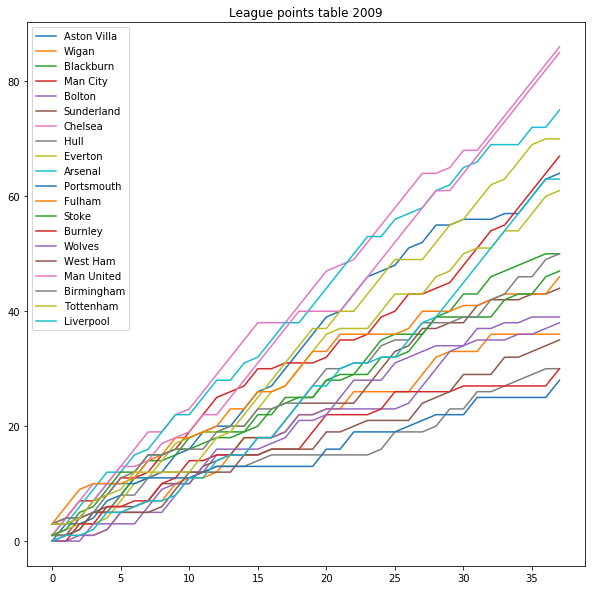

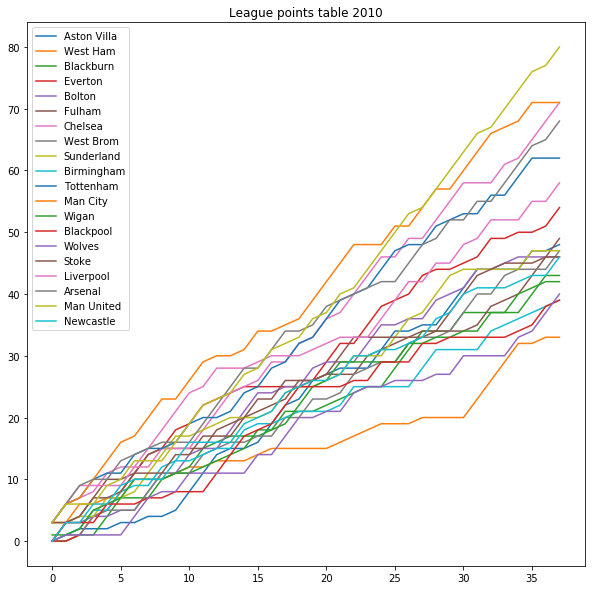

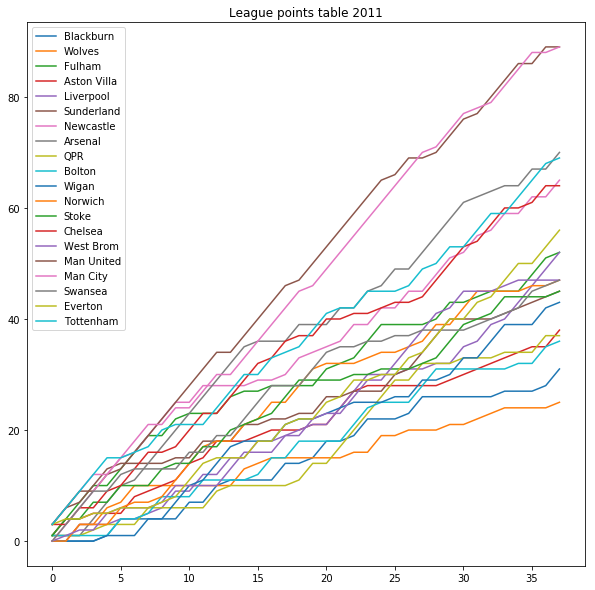

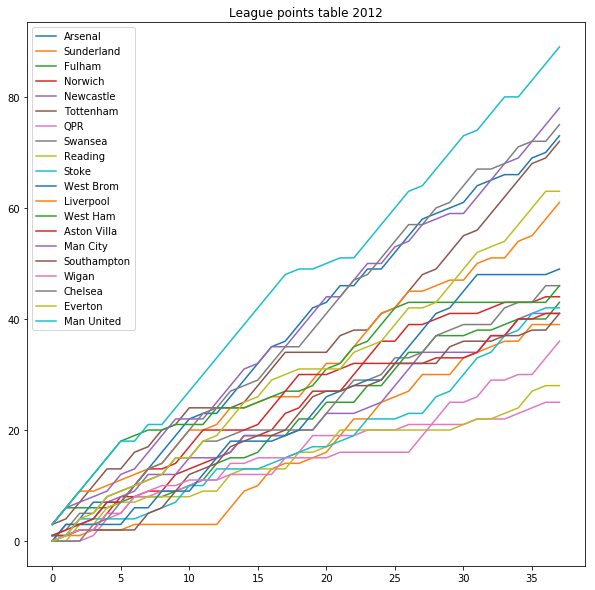

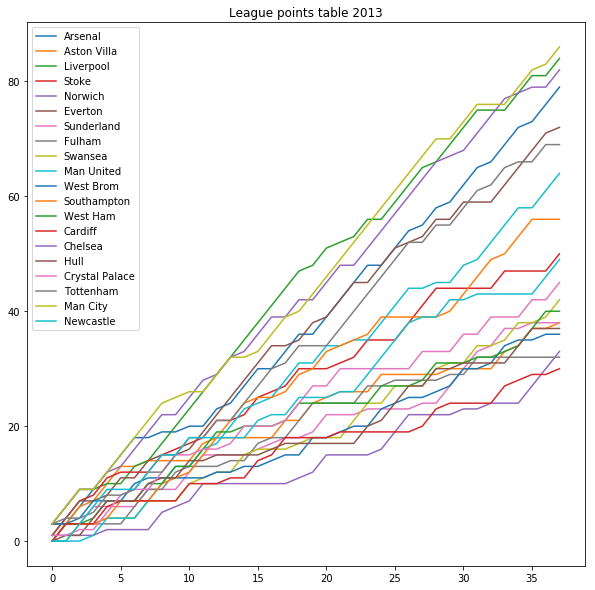

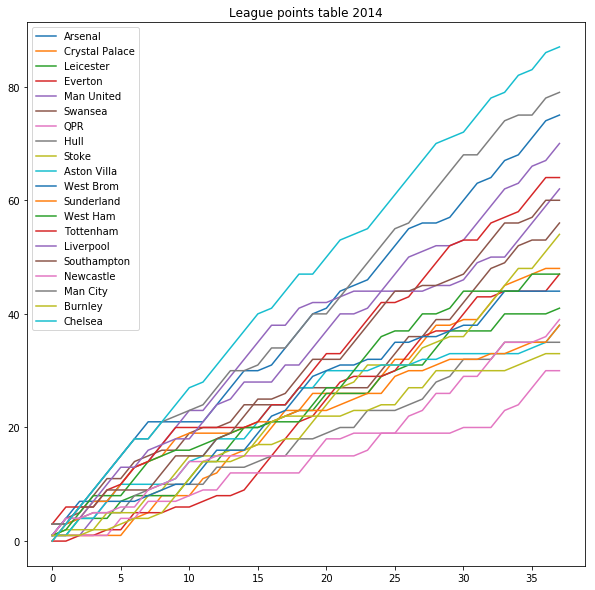

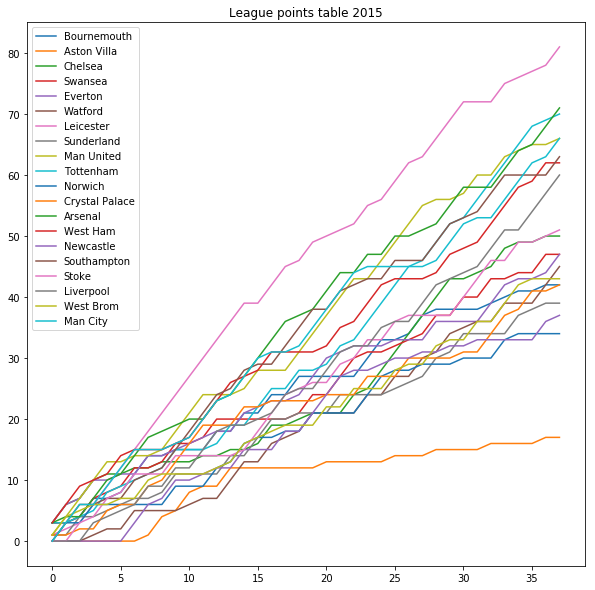

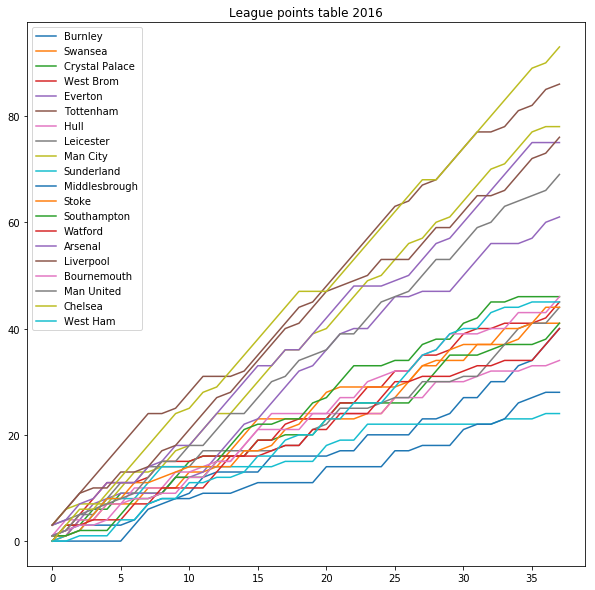

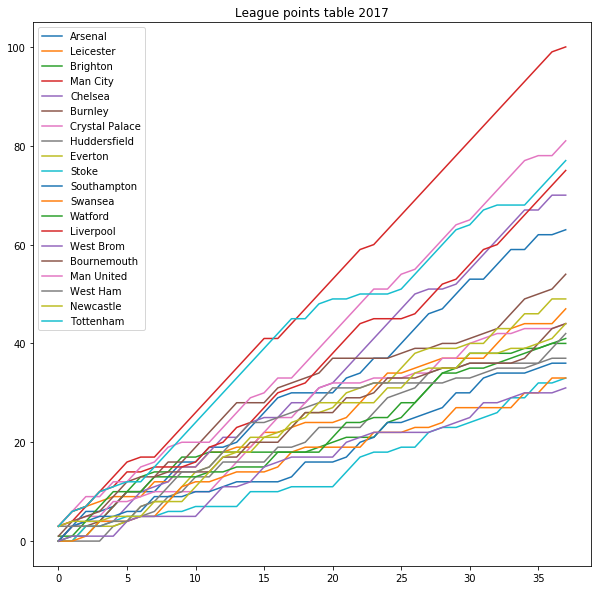

In [181]:
%matplotlib inline
for yr in range(2001,2018):
    pts_table = get_points_table_matchday(raw_input, yr)
    plt.figure(figsize=(10,10))
    for (team, pt_list) in pts_table.items():
        plt.plot(pt_list, label=team)
    plt.title('League points table ' + str(yr))
    plt.legend()
    plt.savefig('result/league_points_' + str(yr) + '.png')
    #plt.show()

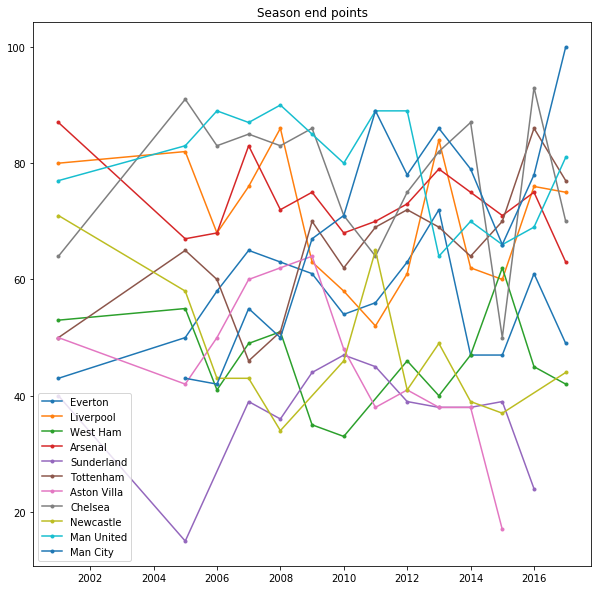

In [188]:
team_points_list = dict()
for yr in range(2001,2018):
    pts_table = get_points_table_seasonend(raw_input, yr)
    for (team, points) in pts_table.items():
        temp = team_points_list.get(team, [list(), list()])
        team_points_list[team] = [temp[0] + [yr], temp[1] + [points]]

plt.figure(figsize=(10,10))
for (team, data) in team_points_list.items():
    if(len(data[0]) > 10):
        plt.plot(data[0], data[1], label=team, marker='.')
plt.title('Season end points')
plt.legend()
plt.show()
plt.savefig('result/final_standings.png')

In [44]:
print(raw_input['SeasonDate'])
#get_season(raw_input['Date'][0])

0       2005.0
1       2005.0
2       2005.0
3       2005.0
4       2005.0
5       2005.0
6       2005.0
7       2005.0
8       2005.0
9       2005.0
10      2005.0
11      2005.0
12      2005.0
13      2005.0
14      2005.0
15      2005.0
16      2005.0
17      2005.0
18      2005.0
19      2005.0
20      2005.0
21      2005.0
22      2005.0
23      2005.0
24      2005.0
25      2005.0
26      2005.0
27      2005.0
28      2005.0
29      2005.0
         ...  
5911    2013.0
5912    2013.0
5913    2013.0
5914    2013.0
5915    2013.0
5916    2013.0
5917    2013.0
5918    2013.0
5919    2013.0
5920    2013.0
5921    2013.0
5922    2013.0
5923    2013.0
5924    2013.0
5925    2013.0
5926    2013.0
5927    2013.0
5928    2013.0
5929    2014.0
5930    2014.0
5931    2014.0
5932    2014.0
5933    2014.0
5934    2014.0
5935    2014.0
5936    2014.0
5937    2014.0
5938    2014.0
5939    2014.0
5940    2014.0
Name: SeasonDate, Length: 5941, dtype: float64


In [113]:
raw_input.columns

Index(['Unnamed: 0', 'HF', 'AST', 'HTAG', 'AwayTeam', 'AR', 'HC', 'HTHG', 'AS',
       'HS', 'HY', 'WHD', 'HST', 'AF', 'FTAG', 'AY', 'WHH', 'HTR', 'IWA',
       'IWD', 'AC', 'FTR', 'IWH', 'HomeTeam', 'WHA', 'FTHG', 'Referee', 'Div',
       'HR', 'Date', 'SeasonDate'],
      dtype='object')

In [135]:
raw_input.head()

,Unnamed: 0,HF,AST,HTAG,AwayTeam,AR,HC,HTHG,AS,HS,...,FTR,IWH,HomeTeam,WHA,FTHG,Referee,Div,HR,Date,SeasonDate
0,0,14.0,6.0,2.0,Bolton,0.0,7.0,2.0,13.0,3.0,...,D,2.1,Aston Villa,2.80,2.0,M Riley,E0,0.0,2005-08-13,2005.0
1,1,15.0,5.0,1.0,Man United,0.0,8.0,0.0,12.0,10.0,...,A,3.8,Everton,1.72,0.0,G Poll,E0,0.0,2005-08-13,2005.0
2,2,12.0,4.0,0.0,Birmingham,0.0,6.0,0.0,7.0,15.0,...,D,2.2,Fulham,2.62,0.0,R Styles,E0,0.0,2005-08-13,2005.0
3,3,13.0,3.0,0.0,West Brom,0.0,3.0,0.0,13.0,15.0,...,D,1.7,Man City,4.33,0.0,C Foy,E0,0.0,2005-08-13,2005.0
4,4,17.0,7.0,0.0,Liverpool,0.0,5.0,0.0,16.0,4.0,...,D,2.5,Middlesbrough,2.30,0.0,M Halsey,E0,1.0,2005-08-13,2005.0


In [ ]:
winners = pd.DataFrame(columns=["team", "date", "points"])


winners = raw_input.loc[raw_input["FTR"]=="H", ][""]

In [163]:
raw_input['SeasonDate'].value_counts()

2015    380
2011    380
2007    380
2014    380
2010    380
2006    380
2017    380
2013    380
2009    380
2005    380
2001    380
2016    380
2012    380
2008    380
2000    380
2018    240
Name: SeasonDate, dtype: int64